In [1]:
import pandas as pd
import os

In [2]:
method = 'kimto1'
categories = 'o2o'
horizon = 1
model_name = 'sac_base'
env_name = 'hedge011'
code = 'IM'
direction = 'long'

In [3]:
dirs = os.path.join(
        './record', 'agent', method, 'g_instruments', 'rolling',
        'normal_factors3', "{0}_{1}".format(categories,
                                            str(horizon)),
        "{0}_{1}_{2}_{3}".format(model_name, env_name,
                                 code, str(direction)))

In [4]:
res = []
for file in os.listdir(dirs):
    filename = os.path.join(dirs, file)
    ext = filename.split('.')
    #print(ext)
    if ext[-1] != 'feather':
        continue
    print(filename)
    dt = pd.read_feather(filename)
    dt = dt.set_index('trade_time')
    res.append(dt)

FileNotFoundError: [Errno 2] No such file or directory: './record/agent/kimto1/g_instruments/rolling/normal_factors3/o2o_1/sac_base_hedge011_IM_long'

In [5]:
ds = pd.concat(res,axis=0).reset_index()

In [6]:
ds['trade_date'] = pd.to_datetime(ds['trade_time']).dt.strftime('%Y-%m-%d')

In [7]:
m1 = ds.groupby('trade_date')['profit'].sum().reset_index()
m1 = m1.set_index('trade_date')
#m1.loc['2024-12-11'] = 231.12
#m1.loc['2024-12-12'] = 641.22
#m1.loc['2024-12-16'] = 1121.31

#m1.loc['2024-11-07'] = -10561.027350
#m1.loc['2024-11-27'] = -8910.945093
#m1.loc['2024-11-29'] =	-6535.672580
#m1.loc['2024-12-02'] = 	-3279.944300
#m1.loc['2024-11-11'] = -9596.306655

<Axes: xlabel='trade_date'>

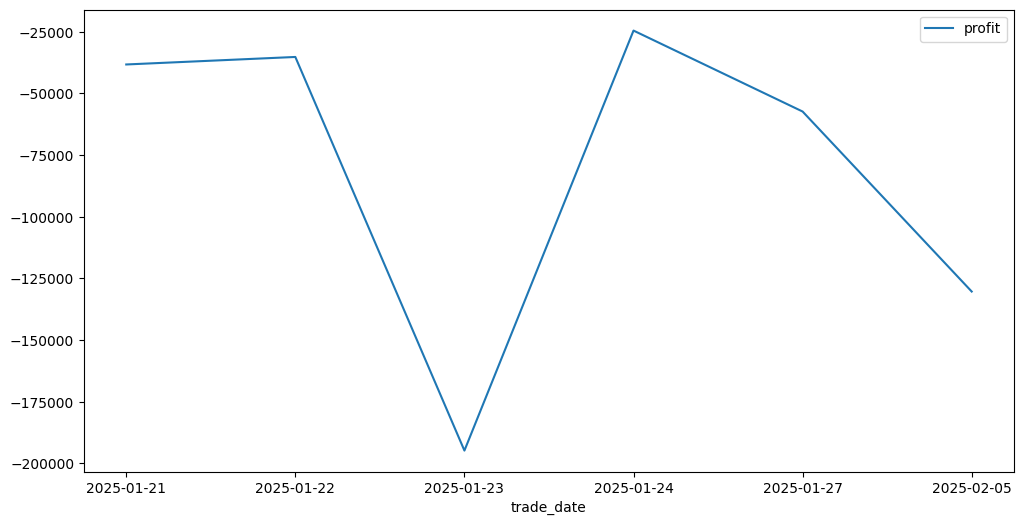

In [8]:
m1.cumsum().plot(figsize=(12, 6))

In [9]:
m1#.cumsum()

,profit
trade_date,
2025-01-21,-38324.256465
2025-01-22,3044.659467
2025-01-23,-159551.594490
2025-01-24,170243.461821
2025-01-27,-32813.915271
2025-02-05,-72963.368523
